In [82]:
from pathlib import Path
import sys

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
from matplotlib.pyplot import figure
from scipy.special import expit
import numpy as np

hydropathies = dict(zip(['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLU', 'GLN', 'GLY', 'HIS',
 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'],
[1.8, -4.5, -3.5, -3.5, 2.5, -3.5, -3.5, -0.4, -3.2, 4.5, 3.8, -3.9, 1.9,
    2.8, -1.6, -0.8, -0.7, -0.9, -1.3, 4.2]))

philic = {"ASP", "SER", "ASN"}
phobic = {"ALA", "TYR", "PHE", "TRP", "VAL"}

In [2]:
figure(figsize=(8, 8))

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

{('ALA', 'SER'): Text(154.135, 108.096, '2'),
 ('ALA', 'TYR'): Text(139.715, 22.646, '5'),
 ('ALA', 'ASP'): Text(124.72999999999999, 182.916, '4'),
 ('ALA', 'PHE'): Text(99.8415, 37.6125, '3'),
 ('ALA', 'TRP'): Text(99.9245, 182.836, '1'),
 ('ALA', 'VAL'): Text(74.2885, 89.656, '1'),
 ('SER', 'ALA'): Text(154.135, 108.096, '2'),
 ('TYR', 'ALA'): Text(139.715, 22.646, '5'),
 ('TYR', 'PHE'): Text(120.22649999999999, -35.033500000000004, '5'),
 ('TYR', 'SER'): Text(174.51999999999998, 35.45, '1'),
 ('ASP', 'ALA'): Text(124.72999999999999, 182.916, '4'),
 ('ASP', 'ASN'): Text(160.56, 275.71000000000004, '3'),
 ('PHE', 'TYR'): Text(120.22649999999999, -35.033500000000004, '5'),
 ('PHE', 'VAL'): Text(54.8, 31.976499999999998, '1'),
 ('PHE', 'TRP'): Text(80.436, 125.1565, '1'),
 ('VAL', 'TRP'): Text(54.883, 177.2, '1')}

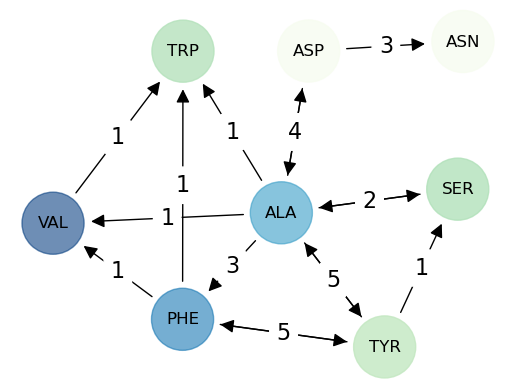

In [109]:
G = nx.DiGraph()

G.add_edge("ALA", "SER", weight = 2)
G.add_edge("SER", "ALA", weight = 2)

G.add_edge("ALA", "TYR", weight = 5)
G.add_edge("TYR", "ALA", weight = 5)

G.add_edge("ALA", "ASP", weight = 4)
G.add_edge("ASP", "ALA", weight = 4)

G.add_edge("ALA", "PHE", weight = 3)
G.add_edge("ALA", "TRP", weight = 1)
G.add_edge("ALA", "VAL", weight = 1)

G.add_edge("TYR", "PHE", weight = 5)
G.add_edge("PHE", "TYR", weight = 5)

G.add_edge("PHE", "VAL", weight = 1)
G.add_edge("PHE", "TRP", weight = 1)

G.add_edge("TYR", "SER", weight = 1)
G.add_edge("ASP", "ASN", weight = 3)
G.add_edge("VAL", "TRP", weight = 1)


pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="neato")
pos["TYR"] = (160.1, -50.0)
pos["PHE"] = (80.353, -20.067)
pos["TRP"] = (80.519, 270.38)
pos["ASP"] = (130.13, 270.54)
pos["ASN"] = (190.99, 280.88)
pos["SER"] = (188.94, 120.9)

fig, ax = plt.subplots()

ax.axis('off')

# color_map = [ 'red' if aa in phobic else 'blue' for aa in G.nodes ]
color_map = [ hydropathies[aa] for aa in G.nodes ]
alpha_map = expit(1 / expit(np.array(color_map))) * .8

nodos = nx.draw_networkx_nodes(G, pos, ax=ax, node_size=2000, 
                       node_color=color_map, cmap=plt.cm.GnBu,
                       alpha=alpha_map)
# nodos.set_alpha(.2)

nx.draw_networkx_labels(G, pos, ax=ax)

edges = [ edge for edge in G.edges() ]

ejes = nx.draw_networkx_edges(G, pos, ax=ax, edgelist=edges,
                       node_size=3000, arrowstyle='-|>', arrowsize=20)

edge_weights = nx.get_edge_attributes(G, "weight")
edge_labels = {edge: edge_weights[edge] for edge in edges}
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels,
                             rotate=False, font_size=16)

In [110]:
fig.savefig("mutgraph.png", dpi = 200)

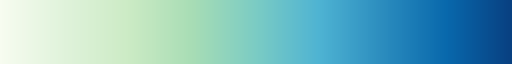

In [108]:
cm.GnBu

In [49]:
from matplotlib.pyplot import cm
import inspect
inspect.getmembers(cm)

[('Accent', <matplotlib.colors.ListedColormap at 0x7fae5bfed4e0>),
 ('Accent_r', <matplotlib.colors.ListedColormap at 0x7fae5bfee470>),
 ('Blues', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfec910>),
 ('Blues_r', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfed8a0>),
 ('BrBG', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfec940>),
 ('BrBG_r', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfed8d0>),
 ('BuGn', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfec970>),
 ('BuGn_r', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfed900>),
 ('BuPu', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfec9a0>),
 ('BuPu_r', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfed930>),
 ('CMRmap', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfec9d0>),
 ('CMRmap_r', <matplotlib.colors.LinearSegmentedColormap at 0x7fae5bfed960>),
 ('ColormapRegistry', matplotlib.cm.ColormapRegistry),
 ('Dark2', <matplotlib.colors.ListedColormap at 0x7fa

----

### Using different weights for each semiedge. This imply plotting curved edges when 2 nodes are double connected with different weights

In [2]:
def my_draw_networkx_edge_labels(G, pos, edge_labels=None, label_pos=0.5, font_size=10, font_color="k",
                                 font_family="sans-serif", font_weight="normal", alpha=None, bbox=None,
                                 horizontalalignment="center", verticalalignment="center", ax=None, rotate=True,
                                 clip_on=True, rad=0):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

In [28]:
# figure(figsize=(13.33333, 13.33333), dpi=300)
plt.gcf().set_size_inches(8, 8)
# plt.tight_layout()

<Figure size 800x800 with 0 Axes>

{('VAL', 'TRP'): Text(54.883, 177.2, '1'),
 ('ALA', 'VAL'): Text(74.2885, 89.656, '1'),
 ('ASP', 'ASN'): Text(160.56, 275.71000000000004, '3'),
 ('PHE', 'VAL'): Text(54.8, 31.976499999999998, '1'),
 ('ALA', 'PHE'): Text(99.8415, 37.6125, '3'),
 ('ALA', 'TRP'): Text(99.9245, 182.836, '1'),
 ('TYR', 'SER'): Text(174.51999999999998, 35.45, '1'),
 ('PHE', 'TRP'): Text(80.436, 125.1565, '1')}

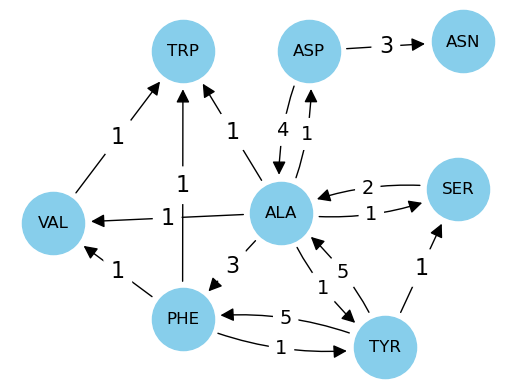

In [74]:
G = nx.DiGraph()

G.add_edge("ALA", "SER", weight = 1)
G.add_edge("ALA", "TYR", weight = 1)
G.add_edge("ALA", "ASP", weight = 1)
G.add_edge("ALA", "PHE", weight = 3)
G.add_edge("ALA", "TRP", weight = 1)
G.add_edge("ALA", "VAL", weight = 1)
G.add_edge("ASP", "ALA", weight = 4)
G.add_edge("ASP", "ASN", weight = 3)
G.add_edge("TYR", "ALA", weight = 5)
G.add_edge("TYR", "PHE", weight = 5)
G.add_edge("TYR", "SER", weight = 1)
G.add_edge("PHE", "TYR", weight = 1)
G.add_edge("PHE", "VAL", weight = 1)
G.add_edge("PHE", "TRP", weight = 1)
G.add_edge("SER", "ALA", weight = 2)
G.add_edge("VAL", "TRP", weight = 1)


pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="neato")
pos["TYR"] = (160.1, -50.0)
pos["PHE"] = (80.353, -20.067)
pos["TRP"] = (80.519, 270.38)
pos["ASP"] = (130.13, 270.54)
pos["ASN"] = (190.99, 280.88)
pos["SER"] = (188.94, 120.9)

fig, ax = plt.subplots()

ax.axis('off')
nx.draw_networkx_nodes(G, pos, ax=ax,  node_size=2000, node_color="skyblue")
nx.draw_networkx_labels(G, pos, ax=ax)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges,
                       node_size=3000, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {.15}',
                       node_size=3000, arrowstyle='-|>', arrowsize=20)




edge_weights = nx.get_edge_attributes(G, "weight")
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False, rad = .15, font_size=14)
nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False, font_size=16)

In [75]:
fig.savefig("mutgraph.png", dpi = 200)